
# **Matriz de Confusão e Métricas**

O objetivo desse projeto é calcular as principais métricas para avaliação de modelos de classificação de dados, como acurácia, sensibilidade (recall), especificidade, precisão e F-score, utilizando os métodos e suas fórmulas correspondentes.

## **Passo 1:**
Importar as bibliotecas

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import io
from sklearn.metrics import confusion_matrix, classification_report

## **Passo 2:**
Carregar e definir as classes

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255.0

classes = [0,1,2,3,4,5,6,7,8,9]

# **Passo 3:**
Construindo o modelo

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

y_pred = np.argmax(model.predict(test_images), axis=-1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 31ms/step - accuracy: 0.8969 - loss: 0.3312 - val_accuracy: 0.9823 - val_loss: 0.0536
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 29ms/step - accuracy: 0.9849 - loss: 0.0484 - val_accuracy: 0.9832 - val_loss: 0.0507
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9903 - loss: 0.0326 - val_accuracy: 0.9853 - val_loss: 0.0419
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9923 - loss: 0.0238 - val_accuracy: 0.9847 - val_loss: 0.0470
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 28ms/step - accuracy: 0.9936 - loss: 0.0184 - val_accuracy: 0.9902 - val_loss: 0.0338
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


# **Gerando a Matriz de Confusão**

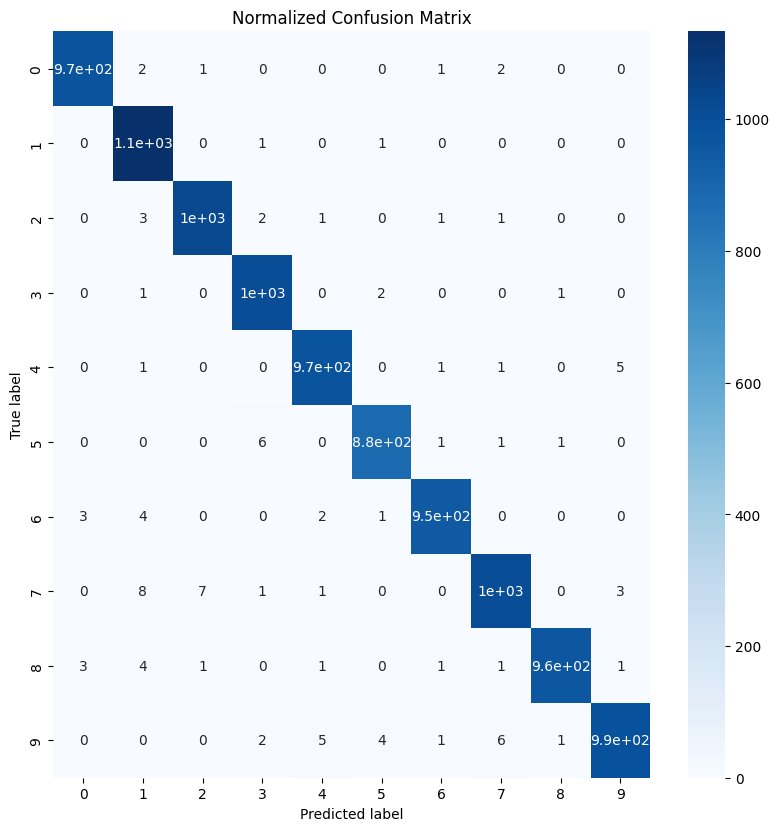

In [ ]:
conf_matrix = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Normalized Confusion Matrix')
plt.show()

# **Gerando a Função de Cálculo de Métricas**

In [ ]:
def calculate_metrics(conf_matrix):
    FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
    FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
    TP = np.diag(conf_matrix)
    TN = conf_matrix.sum() - (FP + FN + TP)

    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    specificity = TN / (TN + FP)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    f1_score = 2 * (precision * recall) / (precision + recall)

    metrics = {
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'Accuracy': accuracy,
        'F1-score': f1_score
    }

    return metrics

In [ ]:
metrics = calculate_metrics(conf_matrix)

for i, class_name in enumerate(classes):
    print(f"\nMétricas da classe {class_name}:")
    print(f"Precisão: {metrics['Precision'][i]:.2f}")
    print(f"Sensibilidade: {metrics['Recall'][i]:.2f}")
    print(f"Especificidade: {metrics['Specificity'][i]:.2f}")
    print(f"Acurácia: {metrics['Accuracy'][i]:.2f}")
    print(f"F1-Score: {metrics['F1-score'][i]:.2f}")

avg_precision = np.mean(metrics['Precision'])
avg_recall = np.mean(metrics['Recall'])
avg_specificity = np.mean(metrics['Specificity'])
avg_accuracy = np.mean(metrics['Accuracy'])
avg_f1_score = np.mean(metrics['F1-score'])

print("\nMédia das Metricas de todas as classes:")
print(f"Precisão Média: {avg_precision:.2f}")
print(f"Sensibilidade Média: {avg_recall:.2f}")
print(f"Especificidade Média: {avg_specificity:.2f}")
print(f"Acurácia Média: {avg_accuracy:.2f}")
print(f"F1-Score Médio: {avg_f1_score:.2f}")

print("\nReporte de Classificação:")
print(classification_report(test_labels, y_pred,target_names=[str(c) for c in classes]))


Métricas da classe 0:
Precisão: 1.00
Sensibilidade: 0.99
Especificidade: 1.00
Acurácia: 1.00
F1-Score: 0.99

Métricas da classe 1:
Precisão: 0.99
Sensibilidade: 1.00
Especificidade: 1.00
Acurácia: 1.00
F1-Score: 1.00

Métricas da classe 2:
Precisão: 0.99
Sensibilidade: 0.99
Especificidade: 1.00
Acurácia: 1.00
F1-Score: 0.99

Métricas da classe 3:
Precisão: 0.99
Sensibilidade: 0.99
Especificidade: 1.00
Acurácia: 1.00
F1-Score: 0.99

Métricas da classe 4:
Precisão: 0.98
Sensibilidade: 1.00
Especificidade: 1.00
Acurácia: 1.00
F1-Score: 0.99

Métricas da classe 5:
Precisão: 0.99
Sensibilidade: 0.99
Especificidade: 1.00
Acurácia: 1.00
F1-Score: 0.99

Métricas da classe 6:
Precisão: 0.99
Sensibilidade: 0.99
Especificidade: 1.00
Acurácia: 1.00
F1-Score: 0.99

Métricas da classe 7:
Precisão: 0.99
Sensibilidade: 0.99
Especificidade: 1.00
Acurácia: 1.00
F1-Score: 0.99

Métricas da classe 8:
Precisão: 0.99
Sensibilidade: 0.99
Especificidade: 1.00
Acurácia: 1.00
F1-Score: 0.99

Métricas da classe